In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [9]:
#preview what the measurement database looklike
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
#to check what columns in Measurement, name and type
inspector=inspect(engine)
inspector_measurement=inspector.get_columns('Measurement')
for x in inspector_measurement:
    print(x["name"],x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#to check what columns in station, name and type
inspector_station=inspector.get_columns('station')
for y in inspector_station:
    print(y["name"],y["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#preview what the station database looklike
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores, and filter out the None value
date_precipitation=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=year_ago).all()
#     filter(Measurement.prcp!=None)
date_precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame, 
date_precipitation=pd.DataFrame(date_precipitation)

# sort the df by date in ascending order and prcp by descending order
date_precipitation = date_precipitation.sort_values(["date", "prcp"], ascending = (True,False ))

# drop duplicates by date and only leave the maximum prcp
# date_precipitation=date_precipitation.drop_duplicates(subset='date', keep="first")
date_precipitation

,date,prcp
1529,2016-08-23,1.79
1881,2016-08-23,0.70
361,2016-08-23,0.15
704,2016-08-23,0.05
1192,2016-08-23,0.02
...,...,...
1527,2017-08-22,0.00
2229,2017-08-23,0.45
1528,2017-08-23,0.08
360,2017-08-23,0.00


In [17]:
# reset the date as the index
index_date=date_precipitation.set_index('date')

index_date.head(5)

,prcp
date,
2016-08-23,1.79
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02


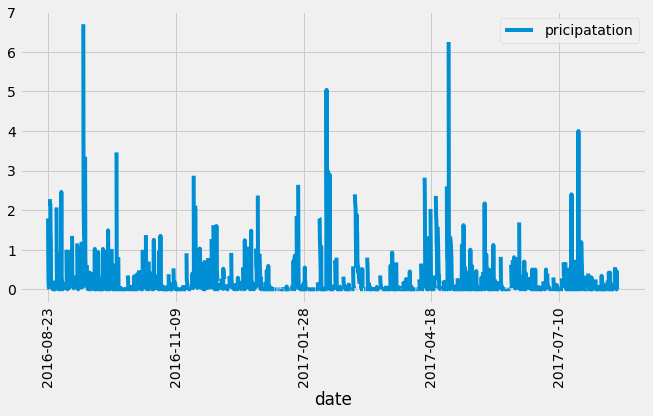

In [39]:
# Plot the results using the DataFrame plot method.
index_date.plot(y='prcp', rot=90, figsize=(10,5), label = 'pricipatation')
plt.legend(loc = 'upper right')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precipitation.describe

<bound method NDFrame.describe of             date  prcp
1529  2016-08-23  1.79
1881  2016-08-23  0.70
361   2016-08-23  0.15
704   2016-08-23  0.05
1192  2016-08-23  0.02
...          ...   ...
1527  2017-08-22  0.00
2229  2017-08-23  0.45
1528  2017-08-23  0.08
360   2017-08-23  0.00
1008  2017-08-23  0.00

[2230 rows x 2 columns]>

# Exploratory Station Analysis

In [20]:
# Check full station list
session.query(Station.station).all()


[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Design a query to calculate the total number stations in the dataset

session.query(func.count(Station.station)).all()

[(9)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [23]:
# Using the most active station id from the previous query, calculate the highest temperature.
station_temperature_highest=session.query(Measurement.tobs,func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.tobs!=None).all()
    
print ("the highest temerature for station USC00519281 is",station_temperature_highest)

the highest temerature for station USC00519281 is [(85.0, 85.0)]


In [24]:
# Using the most active station id from the previous query, calculate the lowest temperature.
station_temperature_lowest=session.query(Measurement.tobs,func.min(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.tobs!=None).all()
    
print ("the lowest temerature for station USC00519281 is",station_temperature_lowest)

the lowest temerature for station USC00519281 is [(54.0, 54.0)]


In [25]:
# Using the most active station id from the previous query, calculate the agerate temperature.
station_temperature_average=session.query(Measurement.tobs,func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.tobs!=None).all()
    
print ("the average temerature for station USC00519281 is",station_temperature_average)

the average temerature for station USC00519281 is [(70.0, 71.66378066378067)]


In [26]:
# Using the most active station id,find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station=='USC00519281').first()

('2017-08-18')

In [27]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_preyear=dt.date(2017,8,18)-dt.timedelta(days=365)
active_station_preyear
active_station=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date>=active_station_preyear).\
    filter(Measurement.tobs!=None).all()

Text(0.5, 0, 'tempeture')

<Figure size 864x864 with 0 Axes>

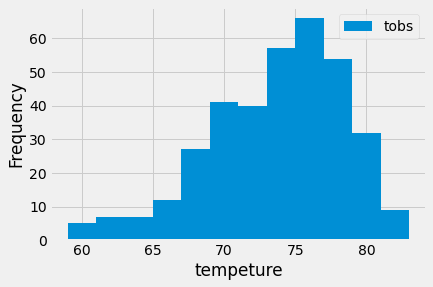

In [28]:
# Plot the results as a histogram with bins=12.

# plt.style.use('ggplot')
# plt.hist(x, bins=10)
# plt.show()
active_station_pd=pd.DataFrame(active_station)

# sort the df by date in ascending order and prcp by descending order
active_station_pd = active_station_pd.sort_values("date",ascending = True)

fig=plt.figure(figsize=(12,12))
active_station_pd.plot.hist(bins=12)
plt.xlabel('tempeture')


# Close session

In [29]:
# Close Session
session.close()